### IQR (Inter Quntile range)

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r"./dataset/loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
dataset.shape

(614, 13)

In [7]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)

In [8]:
IQR = q3 - q1

In [10]:
min_range = q1 - (1.5 * IQR)
max_range = q3 + (1.5 * IQR)
(min_range, max_range)

(np.float64(-3445.875), np.float64(5743.125))

In [15]:
# this will remove most of the outliers : but still some remains : don't remove lot of outliers because this will also loss of your data
new_dataset = dataset[dataset["CoapplicantIncome"] <= max_range]

In [16]:
new_dataset.shape

(596, 13)

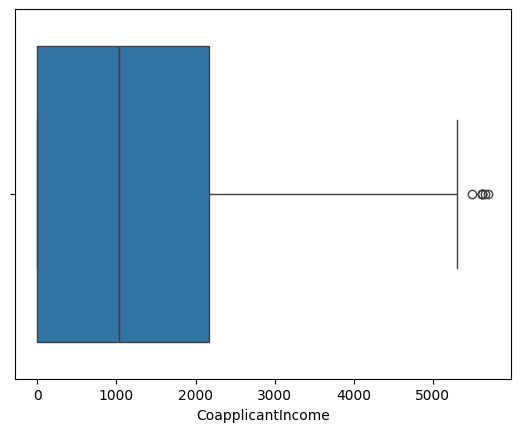

In [17]:
sns.boxplot(x="CoapplicantIncome", data = new_dataset)
plt.show()
